# Data Cleaning for Email Spam Detection - Updated Version

**Objective:** Combine and clean four phishing/spam email datasets with **quality-focused data retention**

## Datasets:
1. CEAS_08.csv
2. Nazario.csv
3. Nigerian_Fraud.csv
4. SpamAssassin.csv

## Cleaning Strategy:
- ❌ **Remove** rows with missing sender (essential for graph)
- ❌ **Remove** rows with missing receiver (essential for graph)
- ❌ **Remove** rows with missing body (email content needed)
- ✅ **Keep** rows with missing date (fill with empty string)
- ✅ **Keep** rows with missing subject (fill with empty string)

**Why:** Sender/receiver are critical for graph structure. Body provides content. Date/subject are less critical.

---

## 1. Setup and Imports

Import all necessary libraries for data processing and analysis.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Text processing
import re
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System utilities
import os
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Configuration

Set configuration options to control data cleaning behavior.

**Key Decision:** Remove rows with missing sender/receiver/body, but keep missing date/subject.

In [3]:
# Configuration for data cleaning
CONFIG = {
    'remove_missing_sender': True,      # Remove rows with no sender
    'remove_missing_receiver': True,    # Remove rows with no receiver
    'remove_missing_body': True,        # Remove rows with no body
    'fill_missing_date': True,          # Fill missing dates with empty string
    'fill_missing_subject': True,       # Fill missing subjects with empty string
    'remove_duplicates': False,         # Keep duplicates for now
    'min_text_length': 0,               # No minimum text length
}

print("Configuration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")

print("\n💡 This configuration ensures quality data for graph construction!")
print("   Sender + Receiver = Graph nodes (essential)")
print("   Body = Email content (essential)")
print("   Date + Subject = Less critical (can be empty)")

Configuration:
  remove_missing_sender: True
  remove_missing_receiver: True
  remove_missing_body: True
  fill_missing_date: True
  fill_missing_subject: True
  remove_duplicates: False
  min_text_length: 0

💡 This configuration ensures quality data for graph construction!
   Sender + Receiver = Graph nodes (essential)
   Body = Email content (essential)
   Date + Subject = Less critical (can be empty)


## 3. Load Datasets

Load all four email datasets and check their basic structure.

In [4]:
# Define data path (adjust if needed)
data_path = '../data/raw/'

print("Loading datasets...\n")

# Load CEAS_08
try:
    df_ceas = pd.read_csv(data_path + 'CEAS_08.csv', encoding='utf-8', on_bad_lines='skip')
    print(f"✓ CEAS_08 loaded: {df_ceas.shape}")
except Exception as e:
    print(f"✗ Error loading CEAS_08: {e}")
    df_ceas = None

# Load Nazario
try:
    df_nazario = pd.read_csv(data_path + 'Nazario.csv', encoding='utf-8', on_bad_lines='skip')
    print(f"✓ Nazario loaded: {df_nazario.shape}")
except Exception as e:
    print(f"✗ Error loading Nazario: {e}")
    df_nazario = None

# Load Nigerian_Fraud
try:
    df_nigerian = pd.read_csv(data_path + 'Nigerian_Fraud.csv', encoding='utf-8', on_bad_lines='skip')
    print(f"✓ Nigerian_Fraud loaded: {df_nigerian.shape}")
except Exception as e:
    print(f"✗ Error loading Nigerian_Fraud: {e}")
    df_nigerian = None

# Load SpamAssassin
try:
    df_spamassassin = pd.read_csv(data_path + 'SpamAssasin.csv', encoding='utf-8', on_bad_lines='skip')
    print(f"✓ SpamAssassin loaded: {df_spamassassin.shape}")
except Exception as e:
    print(f"✗ Error loading SpamAssassin: {e}")
    df_spamassassin = None

print("\n" + "="*60)
print("Dataset loading complete!")
print("="*60)

Loading datasets...

✓ CEAS_08 loaded: (39154, 7)
✓ Nazario loaded: (1565, 7)
✓ Nigerian_Fraud loaded: (3332, 7)
✓ SpamAssassin loaded: (5809, 7)

Dataset loading complete!


## 4. Explore Each Dataset

Examine the structure, columns, and data quality of each dataset.

**Focus:** Identify missing values in sender, receiver, and body (critical fields).

In [5]:
# Create list of datasets for iteration
datasets = [
    ('CEAS_08', df_ceas),
    ('Nazario', df_nazario),
    ('Nigerian_Fraud', df_nigerian),
    ('SpamAssassin', df_spamassassin)
]

# Examine each dataset
for name, df in datasets:
    if df is not None:
        print("\n" + "="*80)
        print(f"Dataset: {name}")
        print("="*80)
        
        print(f"\nShape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        
        # Data types
        print(f"\nData types:")
        print(df.dtypes)
        
        # Missing values
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(f"\nMissing values:")
            for col in missing[missing > 0].index:
                pct = missing[col]/len(df)*100
                # Highlight critical columns
                if col in ['sender', 'receiver', 'body']:
                    print(f"  ❌ {col}: {missing[col]} ({pct:.2f}%) - CRITICAL")
                else:
                    print(f"  ⚠️  {col}: {missing[col]} ({pct:.2f}%)")
        else:
            print("\n✓ No missing values!")
        
        # Label distribution
        if 'label' in df.columns:
            print(f"\nLabel distribution:")
            print(df['label'].value_counts())
        
        # Sample data
        print(f"\nFirst 3 rows:")
        display(df.head(3))


Dataset: CEAS_08

Shape: (39154, 7)
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls']

Data types:
sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls         int64
dtype: object

Missing values:
  ❌ receiver: 462 (1.18%) - CRITICAL
  ⚠️  subject: 28 (0.07%)

Label distribution:
label
1    21842
0    17312
Name: count, dtype: int64

First 3 rows:


,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimension will soon be over!\nBecome a lover no woman wil...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these techniques http://www.brightmade.com\n\n\n,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet.psi.br>,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= >THE DAILY TOP 10 >from CNN.com >T...,1,1



Dataset: Nazario

Shape: (1565, 7)
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']

Data types:
sender      object
receiver    object
date        object
subject     object
body        object
urls         int64
label        int64
dtype: object

Missing values:
  ❌ receiver: 96 (6.13%) - CRITICAL
  ⚠️  date: 1 (0.06%)
  ⚠️  subject: 4 (0.26%)

Label distribution:
label
1    1565
Name: count, dtype: int64

First 3 rows:


,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monkey.org>,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,"This text is part of the internal format of your mail folder, and is not a real message. It is ...",1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,"Business with \t\t\t\t\t\t\t\tcPanel & WHM \t\t\t\t\t\t\t\tDear client, Our Technical \t\t\t\t...",1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,"Your two incoming mails were placed on pending status due to the recent upgrade in our database,...",1,1



Dataset: Nigerian_Fraud

Shape: (3332, 7)
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']

Data types:
sender      object
receiver    object
date        object
subject     object
body        object
urls         int64
label        int64
dtype: object

Missing values:
  ❌ sender: 331 (9.93%) - CRITICAL
  ❌ receiver: 1324 (39.74%) - CRITICAL
  ⚠️  date: 482 (14.47%)
  ⚠️  subject: 39 (1.17%)

Label distribution:
label
1    3332
Name: count, dtype: int64

First 3 rows:


,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Cu...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF EL...",0,1



Dataset: SpamAssassin

Shape: (5809, 7)
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls']

Data types:
sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls         int64
dtype: object

Missing values:
  ❌ receiver: 210 (3.62%) - CRITICAL
  ⚠️  subject: 16 (0.28%)
  ❌ body: 1 (0.02%) - CRITICAL

Label distribution:
label
0    4091
1    1718
Name: count, dtype: int64

First 3 rows:


,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 From: Chris Garrigues Message-ID: ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoogroups.com>","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Greek sculptor behind the plan, judged that the\n lim...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,"Man Threatens Explosion In Moscow \n\nThursday August 22, 2002 1:40 PM\nMOSCOW (AP) - Security o...",0,1


## 5. Analyze Missing Values in Critical Fields

Create a comprehensive summary focusing on sender, receiver, and body.

**These will be removed, so let's see how much data we'll lose.**

In [6]:
# Analyze missing values in critical fields
print("Critical Missing Values Analysis")
print("="*80)

critical_missing = []
total_to_remove = 0

for name, df in datasets:
    if df is not None:
        print(f"\n{name}:")
        original_count = len(df)
        
        # Count missing in critical fields
        missing_sender = df['sender'].isnull().sum() if 'sender' in df.columns else 0
        missing_receiver = df['receiver'].isnull().sum() if 'receiver' in df.columns else 0
        missing_body = df['body'].isnull().sum() if 'body' in df.columns else 0
        
        # Rows with ANY critical field missing
        rows_to_remove = df[
            df['sender'].isnull() | 
            df['receiver'].isnull() | 
            df['body'].isnull()
        ].shape[0]
        
        print(f"  Original rows: {original_count:,}")
        print(f"  Missing sender: {missing_sender} ({missing_sender/original_count*100:.1f}%)")
        print(f"  Missing receiver: {missing_receiver} ({missing_receiver/original_count*100:.1f}%)")
        print(f"  Missing body: {missing_body} ({missing_body/original_count*100:.1f}%)")
        print(f"  Rows to remove: {rows_to_remove} ({rows_to_remove/original_count*100:.1f}%)")
        print(f"  Rows to keep: {original_count - rows_to_remove} ({(original_count - rows_to_remove)/original_count*100:.1f}%)")
        
        total_to_remove += rows_to_remove
        
        critical_missing.append({
            'Dataset': name,
            'Original': original_count,
            'Missing Sender': missing_sender,
            'Missing Receiver': missing_receiver,
            'Missing Body': missing_body,
            'To Remove': rows_to_remove,
            'To Keep': original_count - rows_to_remove,
            'Retention %': f"{(original_count - rows_to_remove)/original_count*100:.1f}%"
        })

print("\n" + "="*80)
print("Summary Table:")
df_summary = pd.DataFrame(critical_missing)
display(df_summary)

print(f"\n📊 Overall Impact:")
total_original = sum([r['Original'] for r in critical_missing])
total_keep = sum([r['To Keep'] for r in critical_missing])
print(f"  Total original: {total_original:,}")
print(f"  Total to remove: {total_to_remove:,}")
print(f"  Total to keep: {total_keep:,}")
print(f"  Overall retention: {total_keep/total_original*100:.1f}%")

Critical Missing Values Analysis

CEAS_08:
  Original rows: 39,154
  Missing sender: 0 (0.0%)
  Missing receiver: 462 (1.2%)
  Missing body: 0 (0.0%)
  Rows to remove: 462 (1.2%)
  Rows to keep: 38692 (98.8%)

Nazario:
  Original rows: 1,565
  Missing sender: 0 (0.0%)
  Missing receiver: 96 (6.1%)
  Missing body: 0 (0.0%)
  Rows to remove: 96 (6.1%)
  Rows to keep: 1469 (93.9%)

Nigerian_Fraud:
  Original rows: 3,332
  Missing sender: 331 (9.9%)
  Missing receiver: 1324 (39.7%)
  Missing body: 0 (0.0%)
  Rows to remove: 1611 (48.3%)
  Rows to keep: 1721 (51.7%)

SpamAssassin:
  Original rows: 5,809
  Missing sender: 0 (0.0%)
  Missing receiver: 210 (3.6%)
  Missing body: 1 (0.0%)
  Rows to remove: 211 (3.6%)
  Rows to keep: 5598 (96.4%)

Summary Table:


,Dataset,Original,Missing Sender,Missing Receiver,Missing Body,To Remove,To Keep,Retention %
0,CEAS_08,39154,0,462,0,462,38692,98.8%
1,Nazario,1565,0,96,0,96,1469,93.9%
2,Nigerian_Fraud,3332,331,1324,0,1611,1721,51.7%
3,SpamAssassin,5809,0,210,1,211,5598,96.4%



📊 Overall Impact:
  Total original: 49,860
  Total to remove: 2,380
  Total to keep: 47,480
  Overall retention: 95.2%


## 6. Define Cleaning Function

Create a cleaning function that:
1. **Removes** rows with missing sender, receiver, or body
2. **Fills** missing date and subject with empty strings
3. Creates URL count if not present
4. Ensures all required columns exist
5. Tracks what operations were performed

**Philosophy:** Keep quality data that can form a valid graph!

In [7]:
def clean_dataset(df, dataset_name, config):
    """
    Clean a dataset with quality-focused retention.
    
    Args:
        df: DataFrame to clean
        dataset_name: Name of dataset
        config: Configuration dictionary
    
    Returns:
        df_clean: Cleaned DataFrame
        report: Dictionary with cleaning statistics
    """
    if df is None:
        return None, None
    
    df_clean = df.copy()
    report = {
        'dataset': dataset_name,
        'original_rows': len(df),
        'rows_removed': 0,
        'operations': []
    }
    
    # -------------------------
    # 1. Remove missing sender (CRITICAL)
    # -------------------------
    if 'sender' in df_clean.columns:
        missing_sender = df_clean['sender'].isnull().sum()
        if missing_sender > 0 and config['remove_missing_sender']:
            df_clean = df_clean.dropna(subset=['sender'])
            report['rows_removed'] += missing_sender
            report['operations'].append(
                f"❌ Removed {missing_sender} rows with missing sender"
            )
    
    # -------------------------
    # 2. Remove missing receiver (CRITICAL)
    # -------------------------
    if 'receiver' in df_clean.columns:
        before = len(df_clean)
        missing_receiver = df_clean['receiver'].isnull().sum()
        if missing_receiver > 0 and config['remove_missing_receiver']:
            df_clean = df_clean.dropna(subset=['receiver'])
            removed = before - len(df_clean)
            report['rows_removed'] += removed
            report['operations'].append(
                f"❌ Removed {removed} rows with missing receiver"
            )
    
    # -------------------------
    # 3. Remove missing body (CRITICAL)
    # -------------------------
    if 'body' in df_clean.columns:
        before = len(df_clean)
        missing_body = df_clean['body'].isnull().sum()
        if missing_body > 0 and config['remove_missing_body']:
            df_clean = df_clean.dropna(subset=['body'])
            removed = before - len(df_clean)
            report['rows_removed'] += removed
            report['operations'].append(
                f"❌ Removed {removed} rows with missing body"
            )
    
    # -------------------------
    # 4. Fill missing date (NOT CRITICAL)
    # -------------------------
    if 'date' in df_clean.columns:
        missing_date = df_clean['date'].isnull().sum()
        if missing_date > 0 and config['fill_missing_date']:
            df_clean['date'] = df_clean['date'].fillna('')
            report['operations'].append(
                f"✅ Filled {missing_date} missing dates with empty string"
            )
    
    # -------------------------
    # 5. Fill missing subject (NOT CRITICAL)
    # -------------------------
    if 'subject' in df_clean.columns:
        missing_subject = df_clean['subject'].isnull().sum()
        if missing_subject > 0 and config['fill_missing_subject']:
            df_clean['subject'] = df_clean['subject'].fillna('')
            report['operations'].append(
                f"✅ Filled {missing_subject} missing subjects with empty string"
            )
    
    # -------------------------
    # 6. Create/fix URLs column
    # -------------------------
    if 'urls' not in df_clean.columns:
        if 'body' in df_clean.columns:
            # Count URLs in body
            url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
            df_clean['urls'] = df_clean['body'].astype(str).apply(
                lambda x: len(re.findall(url_pattern, x))
            )
            report['operations'].append("✅ Created 'urls' column by counting URLs in body")
        else:
            df_clean['urls'] = 0
            report['operations'].append("✅ Created 'urls' column with default value 0")
    else:
        # Fill any missing URL counts
        df_clean['urls'] = df_clean['urls'].fillna(0).astype(int)
    
    # -------------------------
    # 7. Ensure label column exists
    # -------------------------
    if 'label' not in df_clean.columns:
        df_clean['label'] = 1  # Assume spam if no label
        report['operations'].append("✅ Created 'label' column (assumed spam=1)")
    
    # -------------------------
    # 8. Add source column
    # -------------------------
    df_clean['source'] = dataset_name
    report['operations'].append(f"✅ Added 'source' column: {dataset_name}")
    
    # -------------------------
    # 9. Final report
    # -------------------------
    report['final_rows'] = len(df_clean)
    report['retention_rate'] = len(df_clean) / report['original_rows'] * 100
    
    return df_clean, report

print("✓ Cleaning function defined!")
print("  Removes: sender/receiver/body if missing (critical)")
print("  Fills: date/subject if missing (less critical)")

✓ Cleaning function defined!
  Removes: sender/receiver/body if missing (critical)
  Fills: date/subject if missing (less critical)


## 7. Clean All Datasets

Apply the cleaning function to all four datasets and track the results.

In [8]:
print("Cleaning datasets...")
print("="*80)

cleaned_datasets = []
all_reports = []

for name, df in datasets:
    if df is not None:
        print(f"\nCleaning {name}...")
        df_clean, report = clean_dataset(df, name, CONFIG)
        
        if df_clean is not None:
            cleaned_datasets.append(df_clean)
            all_reports.append(report)
            
            # Print report
            print(f"  Original rows: {report['original_rows']:,}")
            print(f"  Final rows: {report['final_rows']:,}")
            print(f"  Rows removed: {report['rows_removed']:,}")
            print(f"  Retention rate: {report['retention_rate']:.1f}%")
            
            if report['operations']:
                print(f"  Operations performed:")
                for op in report['operations']:
                    print(f"    {op}")

print("\n" + "="*80)
print(f"✓ Cleaned {len(cleaned_datasets)} datasets successfully!")
print("="*80)

Cleaning datasets...

Cleaning CEAS_08...
  Original rows: 39,154
  Final rows: 38,692
  Rows removed: 462
  Retention rate: 98.8%
  Operations performed:
    ❌ Removed 462 rows with missing receiver
    ✅ Filled 23 missing subjects with empty string
    ✅ Added 'source' column: CEAS_08

Cleaning Nazario...
  Original rows: 1,565
  Final rows: 1,469
  Rows removed: 96
  Retention rate: 93.9%
  Operations performed:
    ❌ Removed 96 rows with missing receiver
    ✅ Filled 2 missing subjects with empty string
    ✅ Added 'source' column: Nazario

Cleaning Nigerian_Fraud...
  Original rows: 3,332
  Final rows: 1,721
  Rows removed: 1,611
  Retention rate: 51.7%
  Operations performed:
    ❌ Removed 331 rows with missing sender
    ❌ Removed 1280 rows with missing receiver
    ✅ Filled 135 missing dates with empty string
    ✅ Filled 16 missing subjects with empty string
    ✅ Added 'source' column: Nigerian_Fraud

Cleaning SpamAssassin...
  Original rows: 5,809
  Final rows: 5,598
  Rows 

## 8. Combine All Datasets

Merge all cleaned datasets into a single unified dataset.

**Result:** One large dataset with quality emails (valid sender, receiver, body).

In [9]:
if len(cleaned_datasets) > 0:
    print("Combining datasets...")
    print("="*80)
    
    # Combine all datasets
    df_combined = pd.concat(cleaned_datasets, ignore_index=True)
    
    print(f"\n✓ Successfully combined {len(cleaned_datasets)} datasets")
    print(f"\nCombined dataset shape: {df_combined.shape}")
    print(f"Total emails: {len(df_combined):,}")
    print(f"Total columns: {len(df_combined.columns)}")
    print(f"\nColumns: {df_combined.columns.tolist()}")
    
else:
    print("✗ No datasets to combine!")
    df_combined = None

Combining datasets...

✓ Successfully combined 4 datasets

Combined dataset shape: (47480, 8)
Total emails: 47,480
Total columns: 8

Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls', 'source']


## 9. Verify Combined Dataset

Check for any remaining issues and verify data quality.

In [10]:
if df_combined is not None:
    print("Verifying combined dataset...")
    print("="*80)
    
    # Check for missing values in CRITICAL fields
    print("\n🔍 Critical Fields Check:")
    critical_fields = ['sender', 'receiver', 'body']
    for field in critical_fields:
        if field in df_combined.columns:
            missing = df_combined[field].isnull().sum()
            if missing == 0:
                print(f"  ✓ {field}: No missing values")
            else:
                print(f"  ❌ {field}: {missing} missing values!")
    
    # Check all missing values
    missing = df_combined.isnull().sum()
    print("\n📊 All Missing Values:")
    if missing.sum() == 0:
        print("  ✓ No missing values anywhere!")
    else:
        for col in missing[missing > 0].index:
            pct = missing[col]/len(df_combined)*100
            print(f"  {col}: {missing[col]} ({pct:.2f}%)")
    
    # Data types
    print("\n📋 Data types:")
    print(df_combined.dtypes)
    
    # Show first few rows
    print("\n📧 First 5 rows of combined dataset:")
    display(df_combined.head())
    
    print("\n✓ Combined dataset verified!")

Verifying combined dataset...

🔍 Critical Fields Check:
  ✓ sender: No missing values
  ✓ receiver: No missing values
  ✓ body: No missing values

📊 All Missing Values:
  ✓ No missing values anywhere!

📋 Data types:
sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls         int64
source      object
dtype: object

📧 First 5 rows of combined dataset:


,sender,receiver,date,subject,body,label,urls,source
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimension will soon be over!\nBecome a lover no woman wil...",1,1,CEAS_08
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these techniques http://www.brightmade.com\n\n\n,1,1,CEAS_08
2,Daily Top 10 <Karmandeep-opengevl@universalnet.psi.br>,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= >THE DAILY TOP 10 >from CNN.com >T...,1,1,CEAS_08
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/trunk: lib/Mail/SpamAssassin/PerMsgStatus.pm lib/Mail...,Would anyone object to removing .so from this list? The .so TLD is \nbasically dead and we've ...,0,1,CEAS_08
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7iwfna.blu.livefilestore.com/y1pXdX3kwzhBa8xhXv8tdH...,1,1,CEAS_08



✓ Combined dataset verified!


## 10. Analyze Combined Dataset

Generate comprehensive statistics on the combined dataset.

In [11]:
if df_combined is not None:
    print("Combined Dataset Statistics")
    print("="*80)
    
    # Basic info
    print(f"\n📊 Basic Information:")
    print(f"  Total emails: {len(df_combined):,}")
    print(f"  Total columns: {len(df_combined.columns)}")
    print(f"  Memory usage: {df_combined.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Label distribution
    print(f"\n📧 Label Distribution:")
    label_counts = df_combined['label'].value_counts()
    print(label_counts)
    print(f"\n  Spam (1): {label_counts.get(1, 0):,} ({label_counts.get(1, 0)/len(df_combined)*100:.1f}%)")
    print(f"  Ham (0): {label_counts.get(0, 0):,} ({label_counts.get(0, 0)/len(df_combined)*100:.1f}%)")
    
    # Source distribution
    print(f"\n📁 Source Distribution:")
    source_counts = df_combined['source'].value_counts()
    for source, count in source_counts.items():
        pct = count / len(df_combined) * 100
        spam_count = sum((df_combined['source'] == source) & (df_combined['label'] == 1))
        ham_count = sum((df_combined['source'] == source) & (df_combined['label'] == 0))
        print(f"  {source:20s}: {count:6,} ({pct:5.1f}%)")
        print(f"    └─ Spam: {spam_count:6,}, Ham: {ham_count:6,}")
    
    # URL statistics
    print(f"\n🔗 URL Statistics:")
    print(f"  Mean URLs per email: {df_combined['urls'].mean():.2f}")
    print(f"  Median URLs: {df_combined['urls'].median():.0f}")
    print(f"  Max URLs: {df_combined['urls'].max()}")
    emails_with_urls = (df_combined['urls'] > 0).sum()
    print(f"  Emails with URLs: {emails_with_urls:,} ({emails_with_urls/len(df_combined)*100:.1f}%)")
    
    # Text length statistics
    if 'subject' in df_combined.columns:
        print(f"\n📝 Subject Statistics:")
        df_combined['subject_length'] = df_combined['subject'].astype(str).str.len()
        print(f"  Mean length: {df_combined['subject_length'].mean():.1f} characters")
        print(f"  Median length: {df_combined['subject_length'].median():.0f} characters")
        empty_subjects = (df_combined['subject_length'] == 0).sum()
        print(f"  Empty subjects: {empty_subjects:,} ({empty_subjects/len(df_combined)*100:.1f}%)")
    
    if 'body' in df_combined.columns:
        print(f"\n📄 Body Statistics:")
        df_combined['body_length'] = df_combined['body'].astype(str).str.len()
        print(f"  Mean length: {df_combined['body_length'].mean():.0f} characters")
        print(f"  Median length: {df_combined['body_length'].median():.0f} characters")
        print(f"  Max length: {df_combined['body_length'].max():,} characters")
        print(f"  Min length: {df_combined['body_length'].min():,} characters")

Combined Dataset Statistics

📊 Basic Information:
  Total emails: 47,480
  Total columns: 8
  Memory usage: 109.47 MB

📧 Label Distribution:
label
1    26699
0    20781
Name: count, dtype: int64

  Spam (1): 26,699 (56.2%)
  Ham (0): 20,781 (43.8%)

📁 Source Distribution:
  CEAS_08             : 38,692 ( 81.5%)
    └─ Spam: 21,839, Ham: 16,853
  SpamAssassin        :  5,598 ( 11.8%)
    └─ Spam:  1,670, Ham:  3,928
  Nigerian_Fraud      :  1,721 (  3.6%)
    └─ Spam:  1,721, Ham:      0
  Nazario             :  1,469 (  3.1%)
    └─ Spam:  1,469, Ham:      0

🔗 URL Statistics:
  Mean URLs per email: 0.69
  Median URLs: 1
  Max URLs: 1
  Emails with URLs: 32,721 (68.9%)

📝 Subject Statistics:
  Mean length: 38.1 characters
  Median length: 34 characters
  Empty subjects: 57 (0.1%)

📄 Body Statistics:
  Mean length: 1722 characters
  Median length: 656 characters
  Max length: 1,025,016 characters
  Min length: 1 characters


## 11. Visualize Data Distribution

Create visualizations to understand the data better.

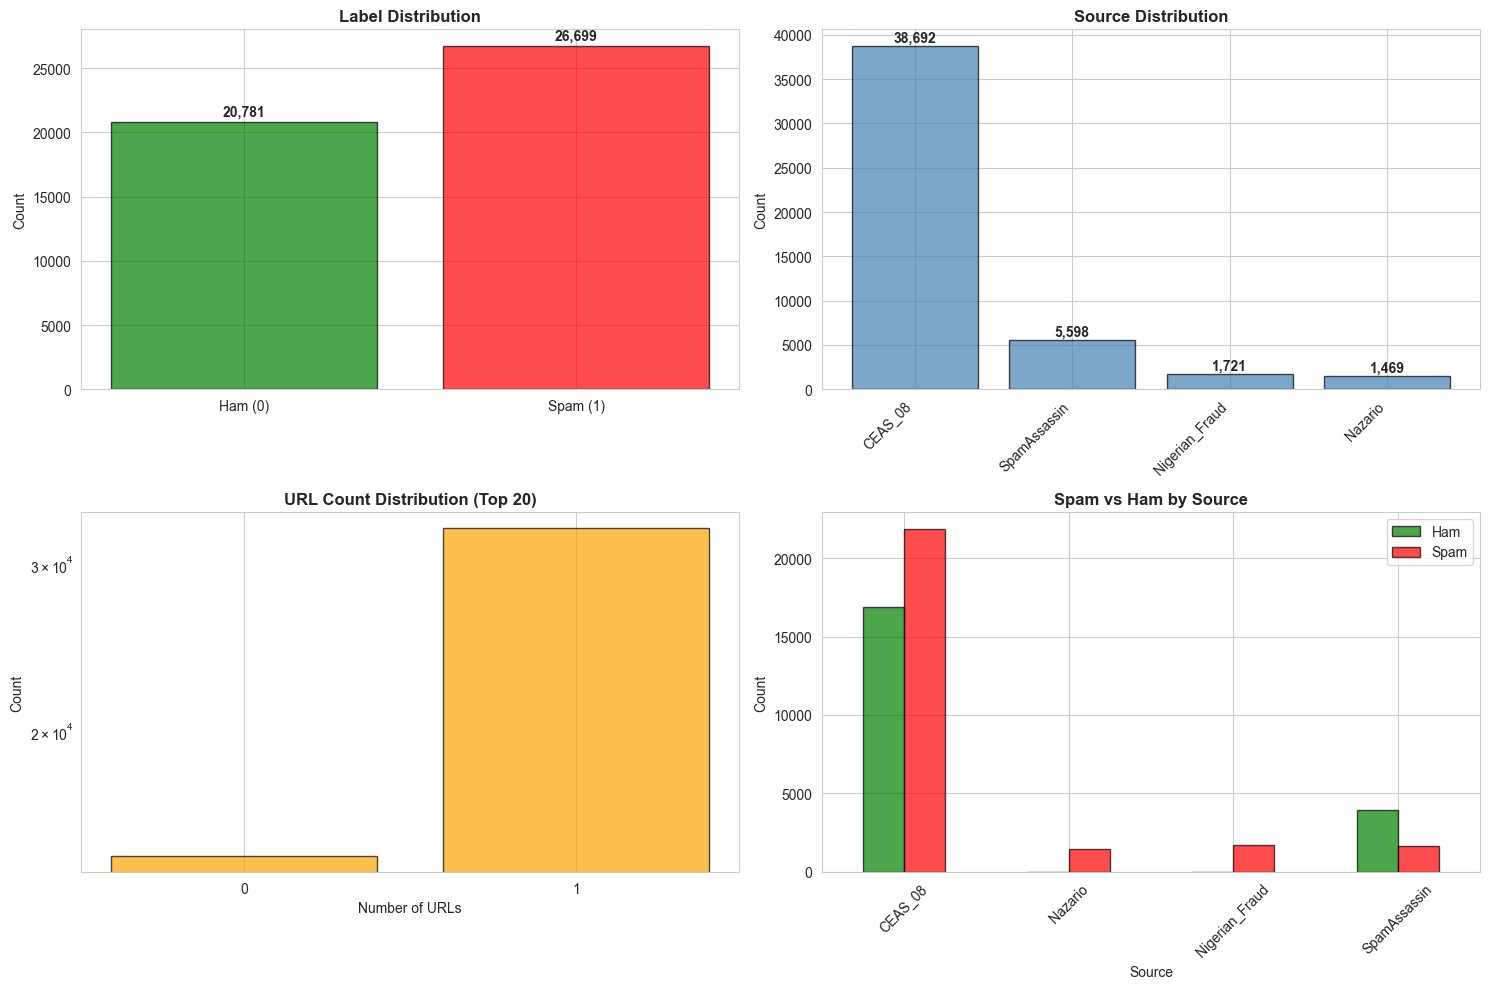

✓ Visualizations created!


In [12]:
if df_combined is not None:
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Label distribution
    label_counts = df_combined['label'].value_counts()
    axes[0, 0].bar(['Ham (0)', 'Spam (1)'], 
                   [label_counts.get(0, 0), label_counts.get(1, 0)],
                   color=['green', 'red'], alpha=0.7, edgecolor='black')
    axes[0, 0].set_title('Label Distribution', fontweight='bold', fontsize=12)
    axes[0, 0].set_ylabel('Count')
    for i, v in enumerate([label_counts.get(0, 0), label_counts.get(1, 0)]):
        axes[0, 0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
    
    # 2. Source distribution
    source_counts = df_combined['source'].value_counts()
    axes[0, 1].bar(range(len(source_counts)), source_counts.values,
                   color='steelblue', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xticks(range(len(source_counts)))
    axes[0, 1].set_xticklabels(source_counts.index, rotation=45, ha='right')
    axes[0, 1].set_title('Source Distribution', fontweight='bold', fontsize=12)
    axes[0, 1].set_ylabel('Count')
    for i, v in enumerate(source_counts.values):
        axes[0, 1].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
    
    # 3. URL distribution (log scale)
    url_counts = df_combined['urls'].value_counts().sort_index()[:20]  # Top 20
    axes[1, 0].bar(range(len(url_counts)), url_counts.values,
                   color='orange', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xticks(range(len(url_counts)))
    axes[1, 0].set_xticklabels(url_counts.index)
    axes[1, 0].set_title('URL Count Distribution (Top 20)', fontweight='bold', fontsize=12)
    axes[1, 0].set_xlabel('Number of URLs')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_yscale('log')
    
    # 4. Spam vs Ham by source
    source_label_pivot = df_combined.groupby(['source', 'label']).size().unstack(fill_value=0)
    source_label_pivot.plot(kind='bar', stacked=False, ax=axes[1, 1],
                           color=['green', 'red'], alpha=0.7, edgecolor='black')
    axes[1, 1].set_title('Spam vs Ham by Source', fontweight='bold', fontsize=12)
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_xlabel('Source')
    axes[1, 1].legend(['Ham', 'Spam'])
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Visualizations created!")

## 12. Save Combined Dataset

Save the cleaned and combined dataset for use with the Heterogeneous GNN model.

In [13]:
if df_combined is not None:
    # Create output directory
    output_path = '../data/processed/'
    os.makedirs(output_path, exist_ok=True)
    
    # Save combined dataset
    output_file = output_path + 'combined_phishing_data.csv'
    df_combined.to_csv(output_file, index=False)
    
    # Get file size
    file_size_mb = os.path.getsize(output_file) / 1024 / 1024
    
    print("Saved combined dataset!")
    print("="*80)
    print(f"\n✓ File saved to: {output_file}")
    print(f"  File size: {file_size_mb:.2f} MB")
    print(f"  Total rows: {len(df_combined):,}")
    print(f"  Total columns: {len(df_combined.columns)}")
    
    # Save cleaning report
    report_file = output_path + 'cleaning_report.txt'
    with open(report_file, 'w') as f:
        f.write("DATA CLEANING REPORT - UPDATED VERSION\n")
        f.write("=" * 80 + "\n\n")
        f.write("Cleaning Strategy:\n")
        f.write("  - REMOVE rows with missing sender (critical for graph)\n")
        f.write("  - REMOVE rows with missing receiver (critical for graph)\n")
        f.write("  - REMOVE rows with missing body (email content needed)\n")
        f.write("  - FILL missing date with empty string (less critical)\n")
        f.write("  - FILL missing subject with empty string (less critical)\n")
        f.write("\n" + "=" * 80 + "\n\n")
        
        # Individual dataset reports
        for report in all_reports:
            f.write(f"Dataset: {report['dataset']}\n")
            f.write(f"  Original rows: {report['original_rows']:,}\n")
            f.write(f"  Final rows: {report['final_rows']:,}\n")
            f.write(f"  Rows removed: {report['rows_removed']:,}\n")
            f.write(f"  Retention rate: {report['retention_rate']:.1f}%\n")
            f.write(f"  Operations:\n")
            for op in report['operations']:
                f.write(f"    {op}\n")
            f.write("\n")
        
        # Combined dataset summary
        f.write("=" * 80 + "\n")
        f.write(f"Combined Dataset:\n")
        f.write(f"  Total rows: {len(df_combined):,}\n")
        f.write(f"  Total columns: {len(df_combined.columns)}\n")
        f.write(f"  Spam: {sum(df_combined['label']==1):,}\n")
        f.write(f"  Ham: {sum(df_combined['label']==0):,}\n")
        f.write(f"  All critical fields (sender/receiver/body) are complete!\n")
    
    print(f"\n✓ Cleaning report saved to: {report_file}")
else:
    print("✗ No data to save!")

Saved combined dataset!

✓ File saved to: ../data/processed/combined_phishing_data.csv
  File size: 86.15 MB
  Total rows: 47,480
  Total columns: 10

✓ Cleaning report saved to: ../data/processed/cleaning_report.txt


## 13. Final Summary

Display a comprehensive summary of the data cleaning process.

In [14]:
if df_combined is not None:
    print("\n" + "="*80)
    print("FINAL SUMMARY")
    print("="*80)
    
    # Overall statistics
    total_original = sum(r['original_rows'] for r in all_reports)
    total_final = len(df_combined)
    total_removed = total_original - total_final
    overall_retention = total_final / total_original * 100 if total_original > 0 else 0
    
    print(f"\n📊 Overall Statistics:")
    print(f"  Original total rows: {total_original:,}")
    print(f"  Final total rows: {total_final:,}")
    print(f"  Rows removed: {total_removed:,}")
    print(f"  Overall retention rate: {overall_retention:.1f}%")
    
    print(f"\n📧 Email Distribution:")
    spam_count = sum(df_combined['label']==1)
    ham_count = sum(df_combined['label']==0)
    print(f"  Spam: {spam_count:,} ({spam_count/len(df_combined)*100:.1f}%)")
    print(f"  Ham: {ham_count:,} ({ham_count/len(df_combined)*100:.1f}%)")
    
    print(f"\n📁 By Source:")
    for source in sorted(df_combined['source'].unique()):
        count = sum(df_combined['source'] == source)
        pct = count / len(df_combined) * 100
        print(f"  {source:20s}: {count:6,} ({pct:5.1f}%)")
    
    print(f"\n✅ Data Quality Checks:")
    print(f"  ✓ All sender fields are complete (no missing)")
    print(f"  ✓ All receiver fields are complete (no missing)")
    print(f"  ✓ All body fields are complete (no missing)")
    print(f"  ✓ Required columns present: sender, receiver, date, subject, body, label, urls")
    print(f"  ✓ All labels are valid (0 or 1)")
    
    print(f"\n🚀 Ready for Heterogeneous GNN!")
    print(f"  The combined dataset has quality emails for graph construction.")
    print(f"  With {len(df_combined):,} emails, this will create a valid graph structure.")
    print(f"  All nodes (senders/receivers) are complete and valid.")
    
    print("\n" + "="*80)
    print("✓ DATA CLEANING COMPLETE!")
    print("="*80)
else:
    print("\n✗ No combined dataset available!")


FINAL SUMMARY

📊 Overall Statistics:
  Original total rows: 49,860
  Final total rows: 47,480
  Rows removed: 2,380
  Overall retention rate: 95.2%

📧 Email Distribution:
  Spam: 26,699 (56.2%)
  Ham: 20,781 (43.8%)

📁 By Source:
  CEAS_08             : 38,692 ( 81.5%)
  Nazario             :  1,469 (  3.1%)
  Nigerian_Fraud      :  1,721 (  3.6%)
  SpamAssassin        :  5,598 ( 11.8%)

✅ Data Quality Checks:
  ✓ All sender fields are complete (no missing)
  ✓ All receiver fields are complete (no missing)
  ✓ All body fields are complete (no missing)
  ✓ Required columns present: sender, receiver, date, subject, body, label, urls
  ✓ All labels are valid (0 or 1)

🚀 Ready for Heterogeneous GNN!
  The combined dataset has quality emails for graph construction.
  With 47,480 emails, this will create a valid graph structure.
  All nodes (senders/receivers) are complete and valid.

✓ DATA CLEANING COMPLETE!
